## Regularization, Underfitting, Overfitting.
Recordemos de ML
Si queremos resolver el problema $Ax = b$, y $A$ no es invertible. Si $A$ tiene columnas linealmente independientes entonces
$A^T A$ tiene inversa y la solucion del sistema

$$ (A^T A) x = A^T b $$
Puede pasar que las columnas de $A$ no sean linealmente independienest (es decir que $\mathcal{N}(A) \ne \{ 0 \}$
En este caso el sistema que se debe resolver es

$$ (A^T A + \lambda I ) x = A^T b \quad , \quad \lambda > 0 \tag{1} $$
Aun, si las columnas de $A$ son linealmente independientes, los autovalores de $A^T A$ podrian ser muy pequenhos y no esta mal regularizar como la ecuacion.

Vamos a hablar del problema de "underfitting" y "overfitting".
El siguiente ejemplo Figura 5.9 es generado con una red convolucional de 7 capas y MaxPooling y las ultimas densas (fully connected).


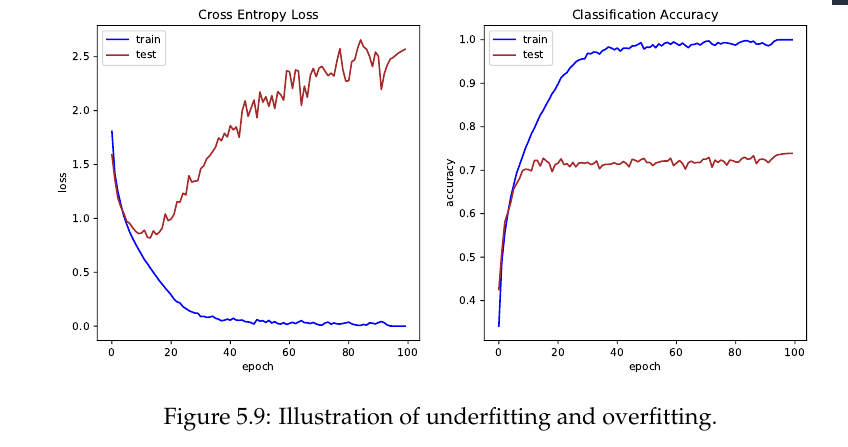

Como podemos resolver el problema de "overfitting" (sobre-ajuste)

1. Incrementar los datos.
Suponga que se entreno el modelo con personas de pie. Se quiere probar con imagenes de personas de pie y sentadas. Probablemente el predictor no funciona bien con personas sentadas. Entonces se vuelve a entrenar el modelo con personas de pie y sentadas. Incrementando asi los datos.


Como se incrementan los datos?

* Si se pueden tomar de la internet bien. Por ejemplo Kaggle, ImageNet, CIFAR, etc. Si no toca recorgerlos manualmente.

* Data Augmentation (Aumento de datos).
Lo que se puede hacer con imagenes es:
    * flip (reflejarlas)
    * rotar
    * cortadas
    * escalar (zoom).
    * etc.

2. Reducir parametros.
El "overfitting" sucede muchas veces por entrenar con mucho detalles.
    * Si es regresion, usar polinomios de bajo grado
    * si es ANN: Reducir nodos (neuronas) o capas.
    * Vamos a ver una tecnica llamada "Dropout" en minutos.

3. Regularizacion.
Hay dos tipos comunes de regularizacion

    *  Usando la norma 1
$$J_1(\theta) = C(\theta) + \lambda \|\theta \|_1 $$

    *  Usando la norma 2
$$J_2(\theta) = C(\theta) + \lambda \|\theta \|_2^2 $$
Si $\lambda > 0$ es muy grande entonces el suavizado es mucho y podemos incurrir en subajuste. Recuerden en ML.

4. Early Stopping (parar temprano).
Por ejemplo volviendo a la Figura. Para en la epoca 5 tiene un poco de sentido y se tiene una precision de mas o menos 70%.

5. Dropout: Esta tecnica fue introducida en Toronto por el grupo de Geoffrey E. Hinton. Se usa en redes neuronales (deep learning) donde se eliminan nodos (neuronas) de forma aleatorio.

La Figura 5.10 ilustra esto.

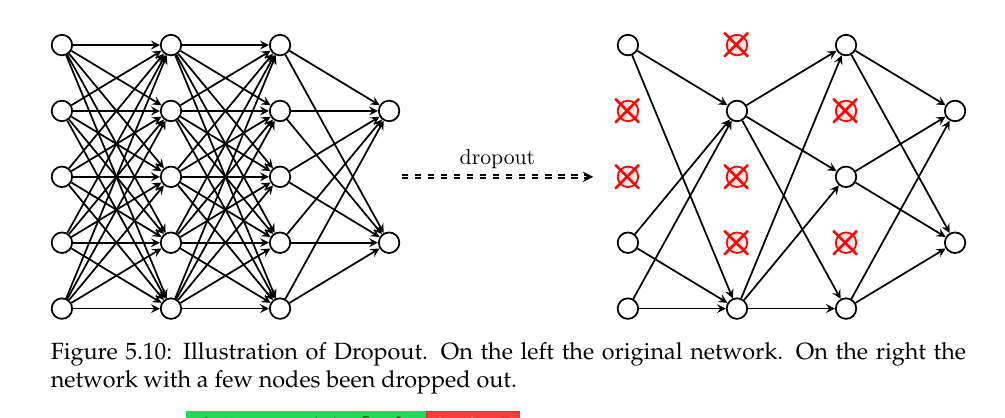

La Figura 5.11. Es el resultado de dropout 0.2 en la Figura 5.9

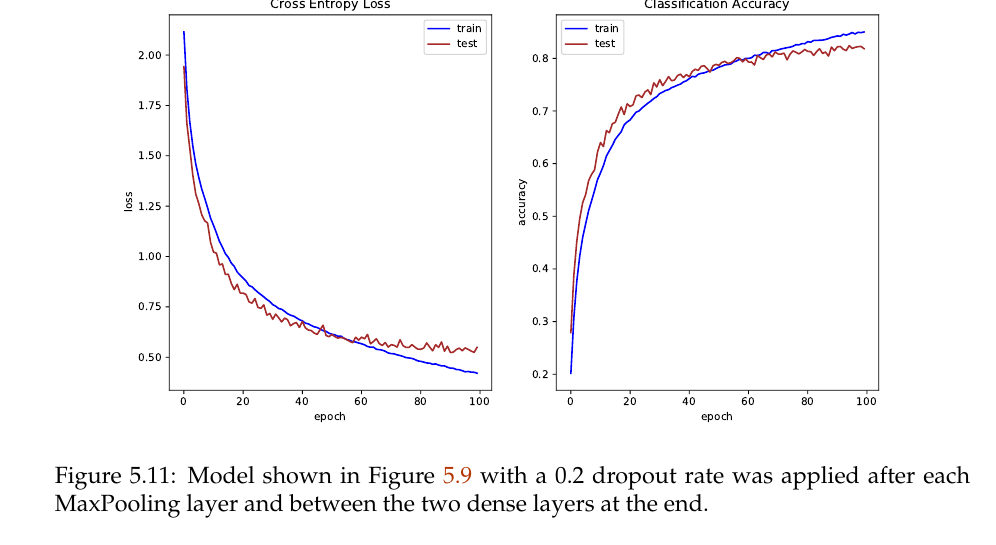

6. Batch Normalizacion.
La idea es que en cada capa se haga una "standarization". Se remueva la media y se divida por al desviacion estandard. Recuerden de la clase de ML : feature normalizacion. En ese caso el contexto era de regresion lineal. Ahora estamos en otro contexto de redes neuronales.

En cada capa se calcula

$$z = \Theta x + b $$
pues ser $z$ el resultado de una convolucion.
Este $z$ es el se normaliza.
Que beneficios tiene?

* Acelera la convergencia. Las elipses se vuelven mas circulares. El condition number se disminuye. Esto fue "inventado" por Sergey Ioffe y Christian Szegedy en 2015 (de Google Inc). Ellos hablan de "internal covariance shift".

* Ayuda con el problema del vanishing/exploding gradient.

# Arquitecturas Populares de CNN.
En la clase yo trabajre con `Keras` y `TensorFlow`.

## LeNet-5 (1998).
[Otras LeNets: Sik_Ho Tsang](https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17)

La LeNet-5 es muy importante por que es la primera exitosa, practica y que combina convolucion con "backpropagation".


Comenzemos con la arquitectura en una Figura.

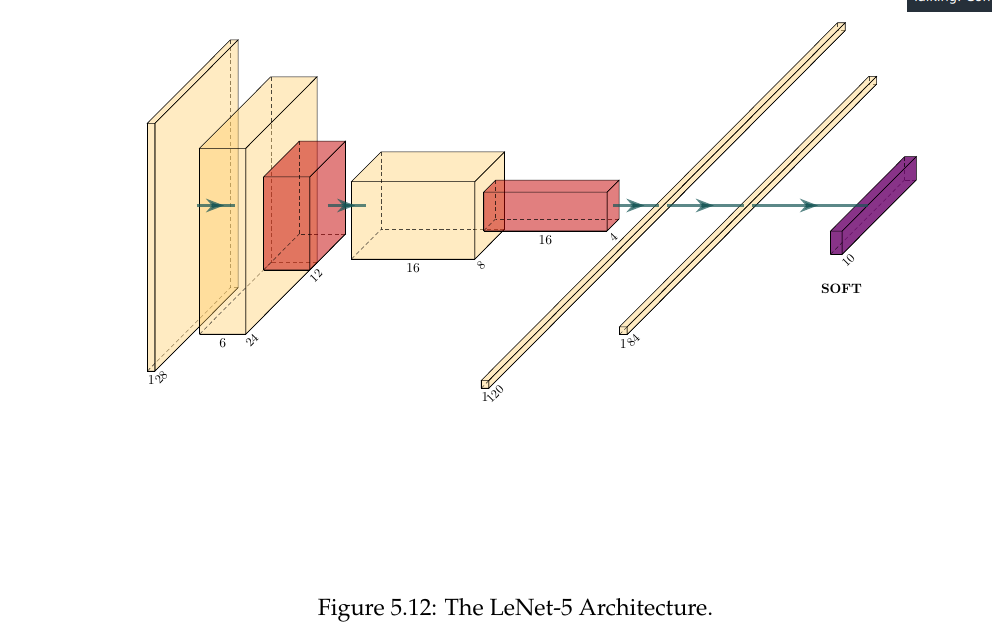

Los detalles siguien:

* 3 capas convolutivas
* 2 capas de "average pooling"
* 1 Fully connected (densa), luego de "flattening"
* Un clasificador `softmax`

[Enlace recomendado](https://pub.towardsai.net/the-architecture-implementation-of-lenet-5-eef03a68d1f7)

La arquitectura paso-a-paso.

* L0: La entrada tiene imagenes de 28x28 pixeles en color gris (un canal $28 \times 28 \times 1$) con la base de datos de MNIST.

* L1 : La primera convolucion C1. El kernel es de 5x5 con no padding $p=0$ y stride $s=1$. Esto reduce el tamanho de $28 \times 28$ a $24 \times 24$. Por que?

$$ (N-k+p)/s + 1 = (28 - 5 + 0)/1 + 1 = 24 $$

A parte de esto debemos tambien contar el numero de parametros.

$$\text{training parameters} = (5 \times 5 \times 1+1)\times 6 = 156 $$

El articulo original usa activacion `sigmoid` pero yo aca voy usar la ReLU.

* L1P: Pooling tambein conocida como S2. El pooling es average
con 6 filtros $k_x=2, k_y=2$, 0 padding y stride $s=2$.

$$ (N-k+p)/s + 1 = (24 - 2 + 0)/2 + 1 = 12 $$
O sea que la salida es $12 \times 12 \times 6$.
Ojooo. El pooling no tiene parametros.

* L2: Capa C2 de convolucion: El kernel $5 \times 5$, 16 filtros de salida, padding $p=0$, $s=1$.

$$ (N-k+p)/s + 1 = (12 - 5 + 0)/1 + 1 = 8 $$
La salida tiene

$$8 \times 8 \times 16 $$

$$\text{training parameters} = (5 \times 5 \times 6+1)\times 16 = 2416 $$


* L2P (P2): Average pooling con tamanho de kernel $2 \times 2$, stride $s=2$, filtros 16. Entonces

$$ (N-k+p)/s + 1 = (8- 2 + 0)/2 + 1 = 4 $$
El tamanho de salida es
$$4 \times 4 \times 16 $$

* L3: Tercera y ultima capa convolutiva (C3). El tamanho del kernel es $4 \times 4$, 120 filtros, $s=1,p=0$

$$ (N-k+p)/s + 1 = (4- 4 + 0)/1 + 1 = 1 $$
La salida es

$$ 1 \times 1 \times 120$$.
$$\text{training parameters} = (4 \times 4 \times 16 + 1) \times 120 = 30840 $$



* L4: Fully connected. Los filtros de salida son 84 (nodos)
$$\text{training parameters} = (120 + 1) )\times 84 = 10164. $$

* L5: Softmax. La salida tiene 10 clases (los digitos)

$$\text{training parameters} = (84 + 1) )\times 10 = 840 $$


In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from tensorflow.keras.optimizers import Adam

from keras.utils import plot_model

In [3]:
# importamos los datos y verificamos dimensiones
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train, y_train", x_train.shape, y_train.shape)
print("x_test, y_test", x_test.shape, y_test.shape)

x_train, y_train (60000, 28, 28) (60000,)
x_test, y_test (10000, 28, 28) (10000,)


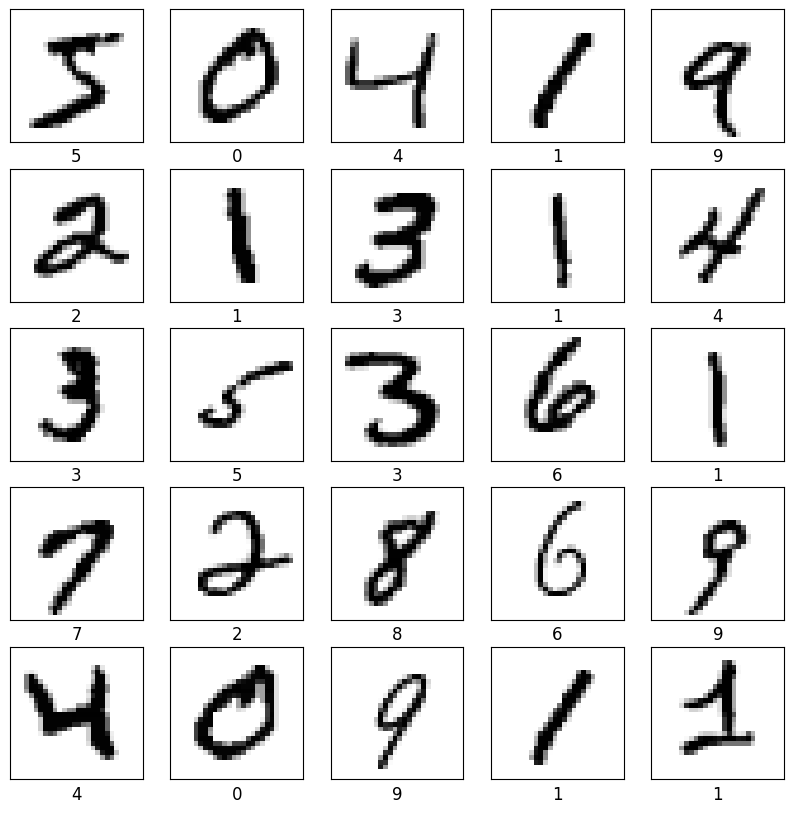

In [6]:
# dibujemos algunos datos
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))

# plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    # show true labels
    xlabel = "{0}".format(y_train[i])
    plt.xlabel(xlabel, fontsize=12)
plt.show()


In [7]:
# reshaping to 4 rank tensors
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# one hat encoding the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
# build the model architecture
model = Sequential()

# Add  a convolutional layer C1
# Input shape = (28 x 28). Lecun original is (32 x 32)
# number of filters 6
# kernel size 5 x 5
# padding p=0
# striding s=1
model.add( Conv2D( filters = 6,
                  kernel_size=5,
                  strides = 1,
                  activation = 'relu',
                  input_shape= (28, 28, 1)))

# Add a pooling layer 32 filters
# Input shape (24 x 24)
# kernel 2 x 2
# padding p=0
# strding = 2
model.add(AvgPool2D(pool_size=(2,2)))

# Add convolutional layer C3
# input shape (12 x 12)
# kernel size (5 x 5)
# filters 16
# padding p=0
# strides s=1
model.add(Conv2D(filters=16,
                 kernel_size=5,
                 strides=1,
                 activation='relu'))

# add Average Pooling layer
# number of filters 16
# filter size (2 x 2)
# padding p=0
# strding s = 2
model.add(AvgPool2D(pool_size=(2,2)))

# la original tiene una convolucion mas, pero aca no
# la hacemos
model.add(Flatten())

# add dense layer
# number of input 256
# number of output 120
model.add(Dense(120, activation='relu'))

# add one dense layer with 84 filters
model.add(Dense(84, activation='relu'))

# add dense layer for classification (softmax)
model.add(Dense(10, activation='softmax'))
model.summary()







/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# compile the model
model.compile(loss=keras.metrics.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [18]:
# model fit (training: entrenamiento)
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8091 - loss: 1.4621 - val_accuracy: 0.9733 - val_loss: 0.0854
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9765 - loss: 0.0767 - val_accuracy: 0.9797 - val_loss: 0.0618
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9849 - val_loss: 0.0506
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9872 - val_loss: 0.0460
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9866 - val_loss: 0.0438
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9857 - val_loss: 0.0501
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9925 - loss: 0.0228 - 

In [25]:
# plotting tool
def plot_example(X, y, y_pred=None):
    """
    plot 9 samples and their associate labels

    Parameters:
    -X: Training samples
    -y : True labels
    -y_pred: Predicted labels
    """

    # create figure with 3x3 plots
    fig, axes = plt.subplots(3, 3, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    X, y = X[:9, ..., 0], y[:9]

    for i , ax in enumerate(axes.flat):
        # plot the image
        ax.imshow(X[i], cmap='binary')

        # show true label
        xlabel = "{0}, Pred: {1}".format(y[i], y_pred[i])
        ax.set_xlabel(xlabel, fontsize=12)

        # remove ticks
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


In [22]:
# score
score = model.evaluate(x_test, y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9826 - loss: 0.0857
Test loss 0.0710625946521759
Test accuracy 0.9855999946594238


In [23]:
# save the model
model.save('lenet.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


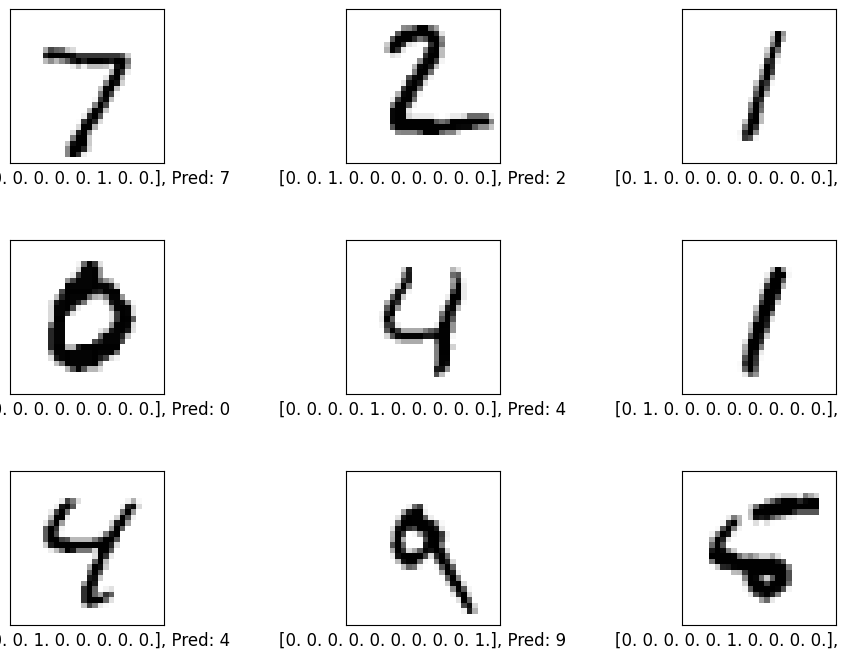

In [26]:
# mas chequeos
model = keras.models.load_model('lenet.h5')

# obtener los indices de prediccion
predictions = model.predict(x_test)
pred_y = np.argmax(predictions, axis=1)

# graficamos los resultados
plot_example(x_test, y_test, pred_y)

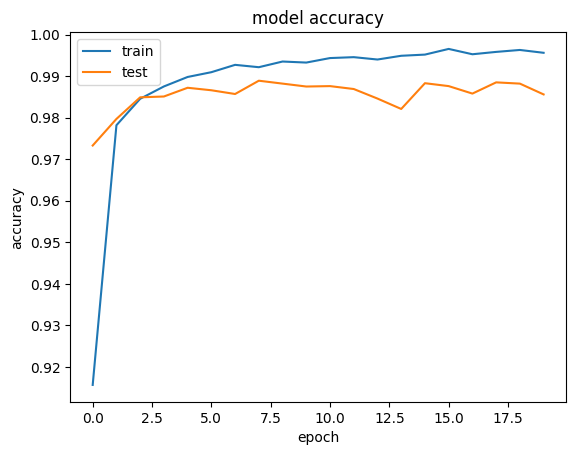

In [27]:
# Accuracy plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## AlexNet (2012).
Autores: A. Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton.
Se desarrollo en el contexto de ILSVRC: Image Large Scale Vission R Challenge. Los datos son del ImageNet. Ellos ganaron el concurso.

* Resolucion $224 \times 224$
* 2 GPUs (primera vez que se usa el GPU en este contexto)
* 1.2 imagenes de entrenamiento (del ImageNet)
* 50 mil imagenes de validacion
* 150 mil imagenes de prueba.
* 1000 clases.

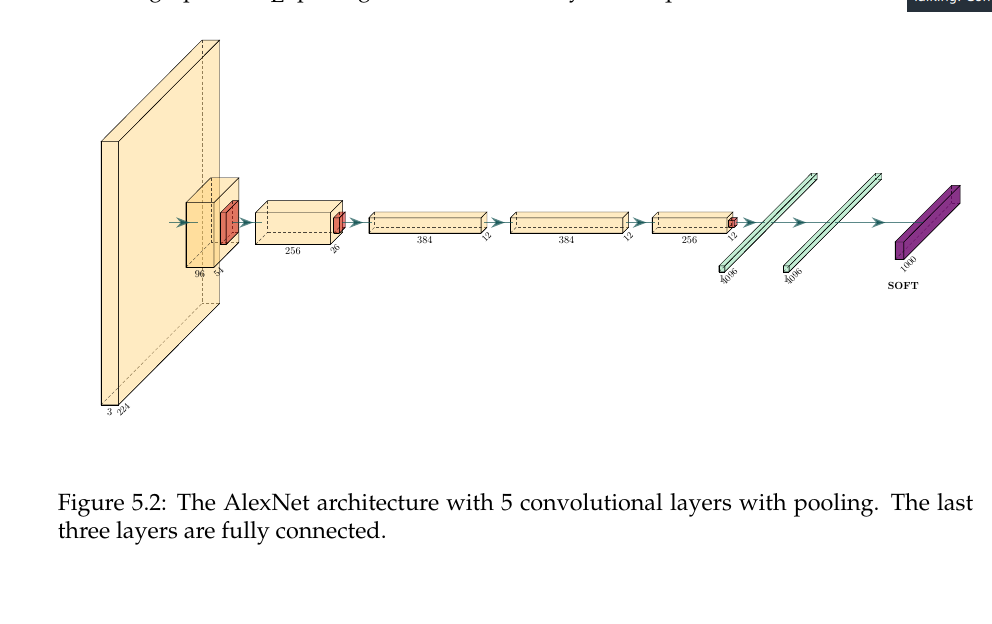

### Comparacion con la LetNet 5
* **Capas convolucionales**: LetNet5 tien 3, la AlexNet tiene 5
* **Funciones de Activacion**: LeNet-5 usa tanh (en el codigo usamos ReLU), la AlexNet ReLU. Ambas usan al final la softmax para la clasificacion
* **Poolin**: LeNet-5 usa AveragePooling mientras que la AlexNet usa MaxPooling.

Ademas la AlexNet usa dropout entre las capas densas.

### Descripcion detallada de la arquitectura
* Capa de entrada y Convolucion 1: La entrada son imagenes de $224 \times 224 \times 3$ pixeles. Se convolucionan con $p=0$, $s=4$, 96 filtros con kernel $11 \times 11$.

La salida es
$$(224 - 11)/4 + 1 = 54.25 $$
Truncando tenemos una salida de
$$54 \times 54 \times 96 $$

$$\text{parametros de aprendizaje} = (11 \times 11 \times 3 +1) \times 96 = 34944 $$

La Figura 5.13 muestra los 96 filtros de la primera convolucion.


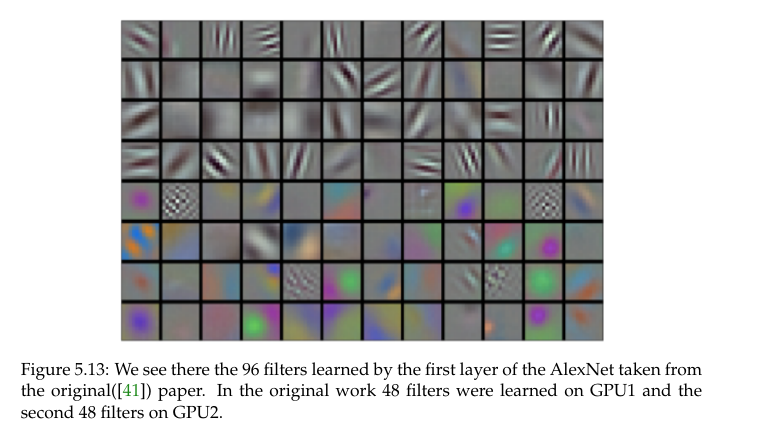

* **MaxPooling**: El tamanho del kernel $3 \times 3$ el stride $s=2$, La salida tiene 96 filtros

$$(54 - 3)/2 +1 = 25.5 \approx 26 $$
El tamanho de la salida es

$$26 \times 26 \times 96 $$

* **Convolucion 2**: El kernel es de $5 \times 5$, $s=1, p=2$, 256 filtros

$$(26 - 5 + 2(2))/1 +1 = 26$$
La salida es
$$26 \times 26 \times 256 $$

$$\text{learning parameters } = (5 \times 5 \times 96+1) \times 256 = 614656 $$

* **MaxPooling**: Kernel $3 \times 3$, Strides $s=2$, no padding, filtros 256.

El tamano de salida es

$$(26 - 3)/2 + 1 = 12.5 \approx 12. $$
$$12 \times 12 \times 256 $$

* **Convolucion 3**: Kernel $3 \times 3$, stride $s=1$, padding $p=1$, filtros 384.


$$(12 - 3 + 2)/1 + 1 = 12 $$
$$ 12 \times 12 \times 384$$

$$\text{learning parameters } = (3 \times 3 \times 256+1) \times 384 = 885120 $$

* **Convolucion 4**: Kernel $3 \times 3$, $s=1$, $p=1$, y 384 filtros

$$(12 - 3 + 2)/1 + 1 = 12 $$
$$ 12 \times 12 \times 384$$

$$\text{learning parameters } = (3 \times 3 \times 384+1) \times 384 = 1327488 $$

* **Convolucion 5**: El kernel es $3 \times 3$, $s=1, p=1$, 256 filtros.

$$(12 - 3 + 2)/1 + 1 = 12 $$
$$ 12 \times 12 \times 256$$

$$\text{learning parameters } = (3 \times 3 \times 384+1) \times 256 = 884992. $$

* **MaxPooling**: Kernel $3 \times 3$, $s=2$ no padding.

$$(12 - 3 + 0)/2 + 1 = 5.5 $$
$$ 5 \times 5 \times 256$$

* **Flatten**: Output size es $5 \times 5 \times 256 = 6400$.

* **Fully Connected**: Input size 6400 la salida es 4096.

$$\text{learning parameters } = (6400 + 1) \times 4096 = 262185496. $$

* **Fully Connected** : Entran 4096 y salen 4096.

$$\text{learning parameters } = (4096 + 1) \times 4096 = 16781312$$.

* **Fully connected**: Softmax a 1000 clases. Entrada 4096 salida 1000.

$$\text{learning parameters } = (4096 + 1) \times 1000 = 4097000$$.

In [30]:
import tensorflow as tf
tf.__version__

'2.18.0'